## 作业-鸢尾花分类

[![2024-09-27-220933.jpg](https://i.postimg.cc/Hx3CgZzv/2024-09-27-220933.jpg)](https://postimg.cc/YG4PNxJQ)

[![back.jpg](https://i.postimg.cc/VkszMgkf/back.jpg)](https://postimg.cc/0b3g1pSF)

## 方法1 SVM 分类 - PCA 降维可视化
## 加载鸢尾花（Iris）数据集，使用 SVM 模型对分类进行训练，并通过 PCA 将数据降维为二维，以便对决策边界进行可视化展示。SVM 的核函数设置为 'rbf'，这是一个常用的非线性核，用于处理更复杂的决策边界。

[![back2.jpg](https://i.postimg.cc/Z5qh0qw0/back2.jpg)](https://postimg.cc/PP07Rdsk)


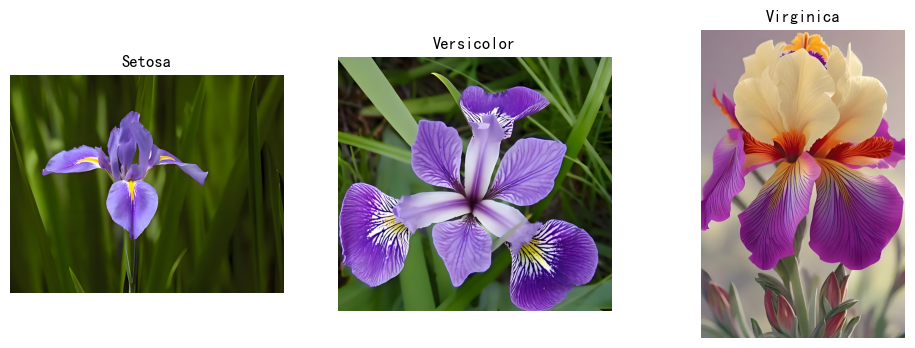

测试集准确率: 1.00


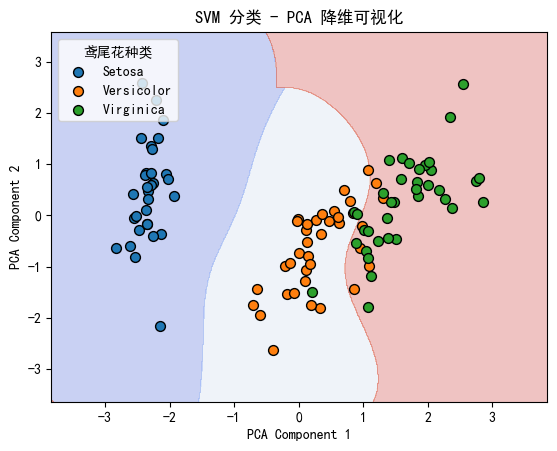

In [11]:
#  方法1 SVM 分类 - PCA 降维可视化
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# 设置中文字体
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 指定图片文件夹的路径
base_path = r'D:\machine-learning\Iris Code -- Machine Learning 3\Iris Code -- Machine Learning 3'
# 展示鸢尾花的图片
def display_iris_images():
    setosa_img_path = os.path.join(base_path, 'setosa.jpg')
    versicolor_img_path = os.path.join(base_path, 'versicolor.jpg')
    virginica_img_path = os.path.join(base_path, 'virginica.jpg')

    setosa_img = Image.open(setosa_img_path)
    versicolor_img = Image.open(versicolor_img_path)
    virginica_img = Image.open(virginica_img_path)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(setosa_img)
    plt.title("Setosa")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(versicolor_img)
    plt.title("Versicolor")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(virginica_img)
    plt.title("Virginica")
    plt.axis('off')

    plt.show()

display_iris_images()

# 加载数据
file_path = os.path.join('D:\machine-learning\Iris Code -- Machine Learning 3\Iris Code -- Machine Learning 3\Iris.csv')
iris = pd.read_csv(file_path)

# 删除 Id 列
iris.drop('Id', axis=1, inplace=True)

# 选择所有四个特征作为输入，Species 作为输出
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris['Species']

# 将类别标签转为数字编码
y = pd.Categorical(y).codes

# 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化特征（SVM 对数据的缩放比较敏感）
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 训练 SVM 模型，使用 RBF 核函数
svm = SVC(kernel='rbf', gamma='auto')  # 'rbf' 核可以处理非线性数据
svm.fit(X_train, y_train)

# 在测试集上预测
y_pred = svm.predict(X_test)
print(f"测试集准确率: {accuracy_score(y_test, y_pred):.2f}")

# 使用 PCA 将特征降维为2D，以便可视化
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# 训练降维后的 SVM 模型（用于可视化）
svm_pca = SVC(kernel='rbf', gamma='auto')
svm_pca.fit(X_train_pca, y_train)

# 绘制决策边界，并为不同类别加上标签
def plot_decision_boundary(X, y, model, labels):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # 对网格点进行预测
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # 分别绘制每个类别的点，并加上标签
    for class_value, label_name in labels.items():
        plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=label_name, edgecolors='k', s=50)
    
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM 分类 - PCA 降维可视化')
    plt.legend(loc='upper left', title="鸢尾花种类")  # 显示图例
    plt.show()

# 定义类别标签
labels = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# 绘制 PCA 降维后的决策边界，并添加标签
plot_decision_boundary(X_train_pca, y_train, svm_pca, labels)

## 方法2
## 为了对 Iris 数据集中的分类结果进行展示，并在二维空间中展示决策边界。
## 通过 神经网络、SVM在降维后的数据上绘制出分割区域。
## 使用 PCA（主成分分析）将高维数据投影到二维空间，再绘制出模型的决策边界和数据点的分布。

[![2024-09-27-220523.jpg](https://i.postimg.cc/85bTCPpH/2024-09-27-220523.jpg)](https://postimg.cc/ZB0G7myB)

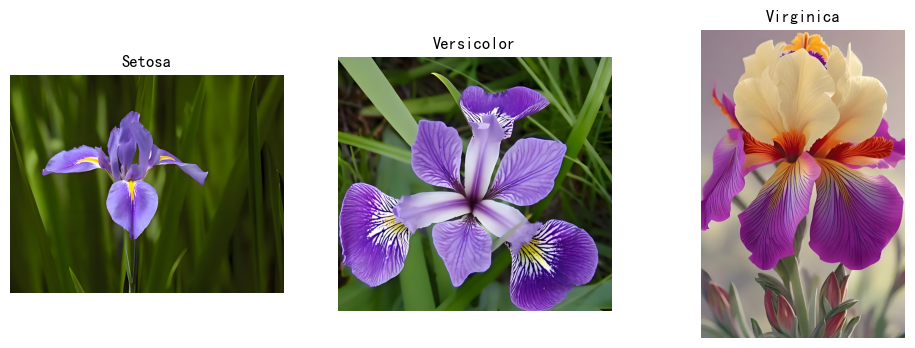

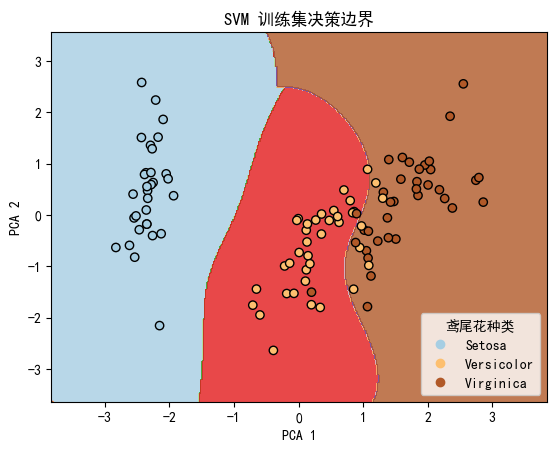

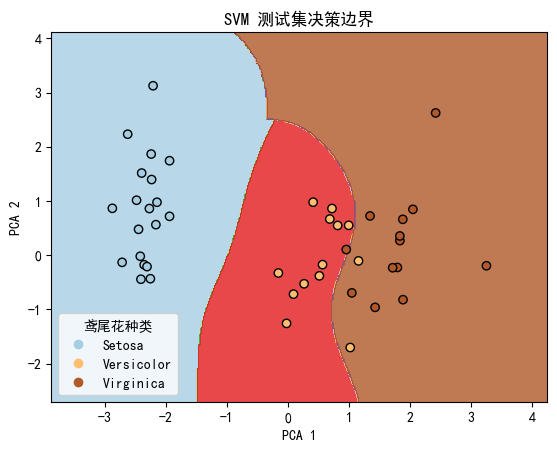

SVM 测试集准确率: 0.93


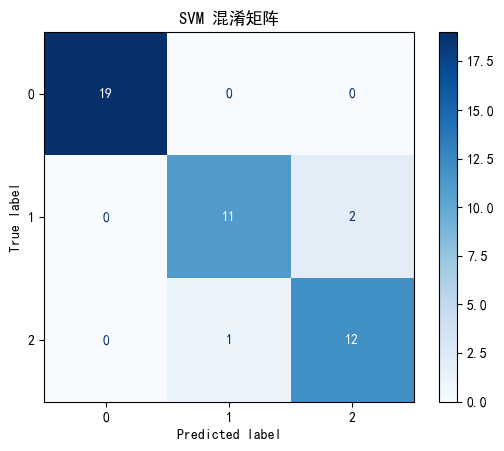

神经网络 测试集准确率: 1.00


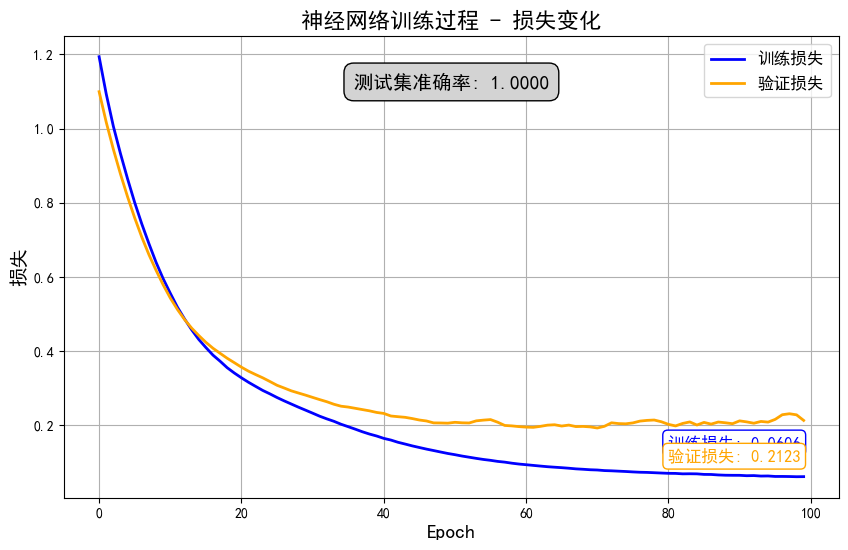

In [12]:
# # 方法2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 设置中文字体
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# 展示鸢尾花的图片
def display_iris_images():
    setosa_img_path = os.path.join(base_path, 'setosa.jpg')
    versicolor_img_path = os.path.join(base_path, 'versicolor.jpg')
    virginica_img_path = os.path.join(base_path, 'virginica.jpg')

    setosa_img = Image.open(setosa_img_path)
    versicolor_img = Image.open(versicolor_img_path)
    virginica_img = Image.open(virginica_img_path)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(setosa_img)
    plt.title("Setosa")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(versicolor_img)
    plt.title("Versicolor")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(virginica_img)
    plt.title("Virginica")
    plt.axis('off')

    plt.show()

display_iris_images()

# 加载数据
file_path = os.path.join('D:\machine-learning\Iris Code -- Machine Learning 3\Iris Code -- Machine Learning 3\Iris.csv')
iris = pd.read_csv(file_path)

# 删除 Id 列
iris.drop('Id', axis=1, inplace=True)

# 选择所有四个特征作为输入，Species 作为输出
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris['Species']

# 将类别标签转为数字编码
y = pd.Categorical(y).codes

# 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 使用 PCA 将 4 维特征降到 2 维，便于绘制分类边界
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# 定义 SVM 模型并进行训练
svm_model = SVC(kernel='rbf', gamma='auto', probability=True)
svm_model.fit(X_train_2d, y_train)

# 绘制决策边界的函数
def plot_decision_boundary(X, y, model, title="决策边界"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # 预测每个点的类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    
    # 绘制不同类别的点并加上标签
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    
    # 添加类别标签
    legend_labels = ['Setosa', 'Versicolor', 'Virginica']
    handles, _ = scatter.legend_elements()
    plt.legend(handles, legend_labels, title="鸢尾花种类")
    
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

# 在训练集上绘制 SVM 的决策边界并添加分类标签
plot_decision_boundary(X_train_2d, y_train, svm_model, title="SVM 训练集决策边界")

# 在测试集上绘制 SVM 的决策边界并添加分类标签
plot_decision_boundary(X_test_2d, y_test, svm_model, title="SVM 测试集决策边界")

# 评估模型性能
y_pred_svm = svm_model.predict(X_test_2d)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM 测试集准确率: {accuracy_svm:.2f}")

# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM 混淆矩阵")
plt.show()

# 构建神经网络模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

def build_neural_network(input_shape):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=input_shape))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=3, activation='softmax'))  # 3 类输出
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# One-hot 编码标签
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# 构建神经网络
nn_model = build_neural_network((X_train.shape[1],))

# 训练神经网络模型
history = nn_model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# 评估神经网络模型
_, nn_accuracy = nn_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"神经网络 测试集准确率: {nn_accuracy:.2f}")

# 可视化神经网络训练过程的损失曲线，并添加标签
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='训练损失', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='验证损失', color='orange', linewidth=2)

# 添加损失曲线的标注，并设置字体大小和背景
plt.annotate(f"训练损失: {history.history['loss'][-1]:.4f}", 
             xy=(len(history.history['loss']) - 1, history.history['loss'][-1]),
             xytext=(-50, 20), textcoords='offset points', ha='center', fontsize=12, color='blue',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='white'))

plt.annotate(f"验证损失: {history.history['val_loss'][-1]:.4f}", 
             xy=(len(history.history['val_loss']) - 1, history.history['val_loss'][-1]),
             xytext=(-50, -30), textcoords='offset points', ha='center', fontsize=12, color='orange',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white'))

# 添加测试集准确率的标签，并设置字体大小和背景框
plt.text(0.5, 0.9, f"测试集准确率: {nn_accuracy:.4f}", ha='center', va='center', transform=plt.gca().transAxes, 
         fontsize=14, color='black', bbox=dict(boxstyle="round,pad=0.5", edgecolor='black', facecolor='lightgray'))

# 设置标题和标签
plt.title('神经网络训练过程 - 损失变化', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('损失', fontsize=14)

# 设置图例大小
plt.legend(fontsize=12)

# 增加网格线，提高图表可读性
plt.grid(True)

# 显示图表
plt.show()




## 方法3
## 神经网络的定义、训练、验证损失的记录：使用了 PyTorch 构建了一个神经网络，并训练了该模型。在训练过程中，记录了训练损失和验证损失，并在训练完成后，绘制了损失随 epoch 的变化曲线。决策边界的可视化：在完成神经网络、SVM、KNN 模型训练后，通过 PCA 将数据降维，并绘制了不同模型在训练集和测试集上的决策边界。

[![2024-09-27-221205.jpg](https://i.postimg.cc/JnpSgy79/2024-09-27-221205.jpg)](https://postimg.cc/ft0HSR9K)

## 加载需要的库

In [5]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from torchviz import make_dot  # 导入用于绘制神经网络结构图的库
from PIL import Image

## 鸢尾花图片展示

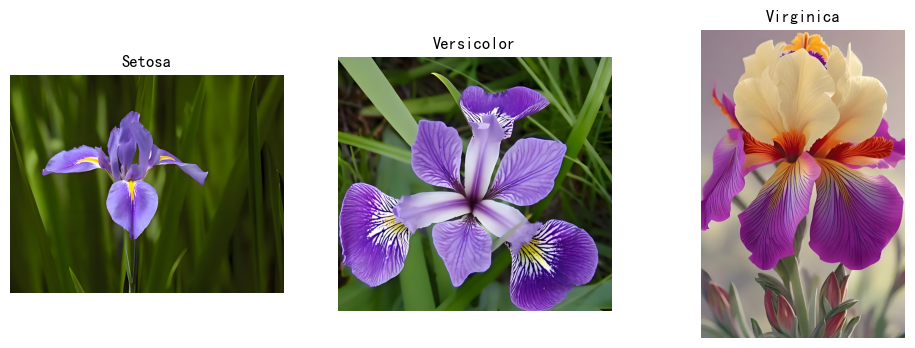

In [6]:
# 设置中文字体
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 展示鸢尾花的图片
def display_iris_images():
    setosa_img_path = os.path.join(base_path, 'setosa.jpg')
    versicolor_img_path = os.path.join(base_path, 'versicolor.jpg')
    virginica_img_path = os.path.join(base_path, 'virginica.jpg')

    setosa_img = Image.open(setosa_img_path)
    versicolor_img = Image.open(versicolor_img_path)
    virginica_img = Image.open(virginica_img_path)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(setosa_img)
    plt.title("Setosa")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(versicolor_img)
    plt.title("Versicolor")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(virginica_img)
    plt.title("Virginica")
    plt.axis('off')

    plt.show()

display_iris_images()


## 神经网络训练

Epoch [10/100], Loss: 0.8952, Val Loss: 0.8387
Epoch [20/100], Loss: 0.7013, Val Loss: 0.6002
Epoch [30/100], Loss: 0.5391, Val Loss: 0.4157
Epoch [40/100], Loss: 0.4238, Val Loss: 0.3051
Epoch [50/100], Loss: 0.3389, Val Loss: 0.2384
Epoch [60/100], Loss: 0.2739, Val Loss: 0.1860
Epoch [70/100], Loss: 0.2225, Val Loss: 0.1414
Epoch [80/100], Loss: 0.1806, Val Loss: 0.1048
Epoch [90/100], Loss: 0.1475, Val Loss: 0.0773
Epoch [100/100], Loss: 0.1227, Val Loss: 0.0585


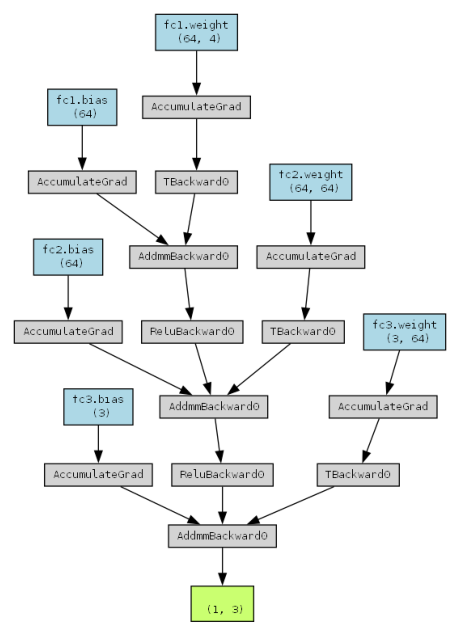

In [7]:

# 加载数据
file_path = os.path.join('D:\machine-learning\Iris Code -- Machine Learning 3\Iris Code -- Machine Learning 3\Iris.csv')
iris = pd.read_csv(file_path)

# 删除 Id 列
iris.drop('Id', axis=1, inplace=True)

# 选择所有四个特征作为输入，Species 作为输出
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris['Species']

# 将类别标签转为数字编码
y = pd.Categorical(y).codes

# 数据集划分为训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 使用 PCA 将 4 维特征降到 2 维，便于绘制分类边界
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_val_2d = pca.transform(X_val)
X_test_2d = pca.transform(X_test)

# 三种鸢尾花类别对应的颜色和标签
flower_labels = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
flower_colors = {0: 'orange', 1: 'blue', 2: 'green'}

# 定义 PyTorch 神经网络模型
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

# 将数据转换为 PyTorch 的张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 初始化神经网络模型、损失函数和优化器
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 3
num_epochs = 100
learning_rate = 0.001

model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 用于记录每个 epoch 的损失
train_loss_history = []
val_loss_history = []

# 训练神经网络
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    train_loss_history.append(loss.item())

    # 前向传播（验证集）
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_loss_history.append(val_loss.item())

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
# 生成并显示神经网络结构图
dummy_input = torch.randn(1, input_size)  # 生成一个虚拟输入
network_viz = make_dot(model(dummy_input), params=dict(list(model.named_parameters())))
network_viz.format = "png"
network_viz.render("neural_network_structure")

# 加载并显示生成的神经网络结构图
img = Image.open('neural_network_structure.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()



## 神经网络训练过程 - 损失变化

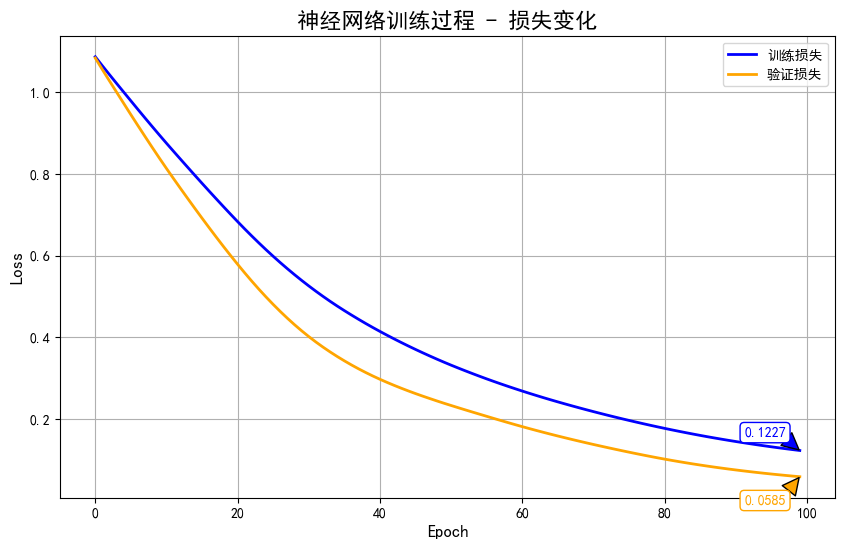

神经网络 测试集准确率: 0.97


In [8]:

# 绘制损失变化图
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label='训练损失', color='blue', linewidth=2)
plt.plot(val_loss_history, label='验证损失', color='orange', linewidth=2)

# 标注训练损失和验证损失的最后一个点
plt.annotate(f"{train_loss_history[-1]:.4f}", 
             xy=(len(train_loss_history)-1, train_loss_history[-1]), 
             xytext=(-40, 10), textcoords='offset points', color='blue',
             arrowprops=dict(facecolor='blue', shrink=0.05),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='white'))

plt.annotate(f"{val_loss_history[-1]:.4f}", 
             xy=(len(val_loss_history)-1, val_loss_history[-1]), 
             xytext=(-40, -20), textcoords='offset points', color='orange',
             arrowprops=dict(facecolor='orange', shrink=0.05),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='orange', facecolor='white'))

# 添加网格、标题和标签
plt.title('神经网络训练过程 - 损失变化', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# 评估神经网络模型
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    _, predicted_train = torch.max(y_pred_train.data, 1)
    train_accuracy = (predicted_train == y_train_tensor).sum().item() / len(y_train_tensor)

    y_pred_test = model(X_test_tensor)
    _, predicted_test = torch.max(y_pred_test.data, 1)
    test_accuracy = (predicted_test == y_test_tensor).sum().item() / len(y_test_tensor)

print(f"神经网络 测试集准确率: {test_accuracy:.2f}")



## 支持向量机模型

In [9]:
# 支持向量机模型
svm_model = SVC(kernel='rbf', probability=True).fit(X_train_2d, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_2d))
print(f"SVM 测试集准确率: {svm_accuracy:.2f}")

SVM 测试集准确率: 0.93


# KNN 模型

In [10]:
# KNN 模型
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train_2d, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test_2d))
print(f"KNN 测试集准确率: {knn_accuracy:.2f}")

KNN 测试集准确率: 0.97


## 绘制不同模型的决策边界

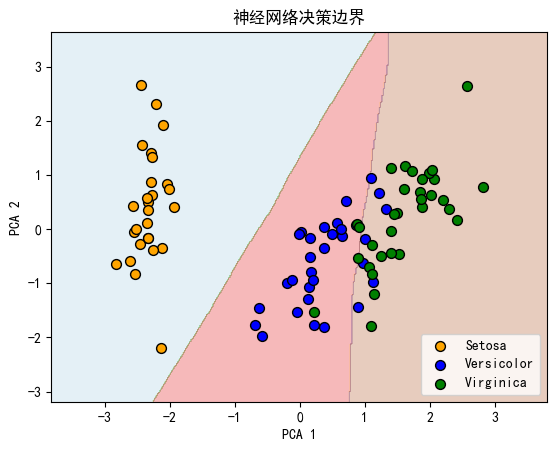

C:\Users\hency\AppData\Local\Temp\ipykernel_40140\3391390729.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', s=100, label='测试集')


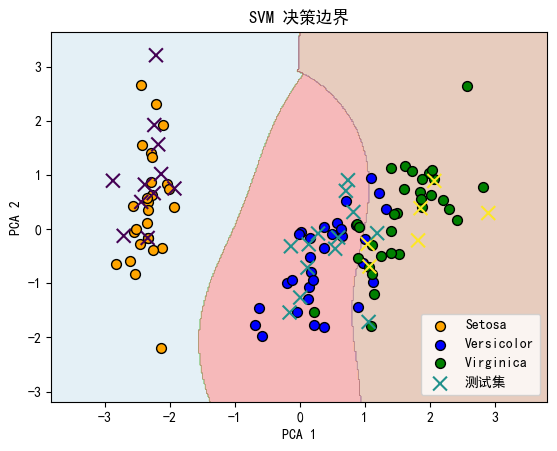

C:\Users\hency\AppData\Local\Temp\ipykernel_40140\3391390729.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', s=100, label='测试集')


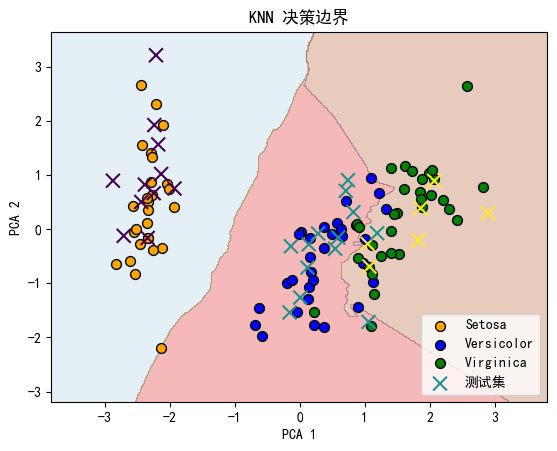

In [11]:
# 绘制不同模型的决策边界
def plot_decision_boundary(X, y, model, title="决策边界", X_test=None, y_test=None, method="Neural Network"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # 预测每个点的类别
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    if method == "Neural Network":
        X_grid_pca = pca.inverse_transform(X_grid)  # 使用 PCA 的逆变换还原原始特征空间
        X_grid_tensor = torch.tensor(X_grid_pca, dtype=torch.float32)
        Z = model(X_grid_tensor)
        Z = torch.argmax(Z, axis=1).numpy()
    else:
        Z = model.predict(X_grid)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    
    # 绘制训练集数据点，并使用颜色区分不同类别
    for class_value in np.unique(y):
        plt.scatter(X[y == class_value, 0], X[y == class_value, 1], color=flower_colors[class_value],
                    edgecolor='k', marker='o', label=flower_labels[class_value], s=50)

    if X_test is not None and y_test is not None:
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', s=100, label='测试集')

    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.show()

# 绘制神经网络决策边界
plot_decision_boundary(X_train_2d, y_train, model, title="神经网络决策边界", method="Neural Network")
# 绘制 SVM 决策边界
plot_decision_boundary(X_train_2d, y_train, svm_model, title="SVM 决策边界", X_test=X_test_2d, y_test=y_test, method="SVM")
# 绘制 KNN 决策边界
plot_decision_boundary(X_train_2d, y_train, knn_model, title="KNN 决策边界", X_test=X_test_2d, y_test=y_test, method="KNN")